<a href="https://colab.research.google.com/github/AkashG1226/Machine-Leaning-Project-/blob/main/DecisionTreeClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier,export_text
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/play_tennis.csv')

In [ ]:
df

,day,outlook,temp,humidity,wind,play
0,D1,Sunny,Hot,High,Weak,No
1,D2,Sunny,Hot,High,Strong,No
2,D3,Overcast,Hot,High,Weak,Yes
3,D4,Rain,Mild,High,Weak,Yes
4,D5,Rain,Cool,Normal,Weak,Yes
5,D6,Rain,Cool,Normal,Strong,No
6,D7,Overcast,Cool,Normal,Strong,Yes
7,D8,Sunny,Mild,High,Weak,No
8,D9,Sunny,Cool,Normal,Weak,Yes
9,D10,Rain,Mild,Normal,Weak,Yes


In [ ]:
le=LabelEncoder()
df['outlook_n']=le.fit_transform(df['outlook'])
df['temp_n']=le.fit_transform(df['temp'])
df['humidity_n']=le.fit_transform(df['humidity'])
df['wind_n']=le.fit_transform(df['wind'])
df

,day,outlook,temp,humidity,wind,play,outlook_n,temp_n,humidity_n,wind_n
0,D1,Sunny,Hot,High,Weak,No,2,1,0,1
1,D2,Sunny,Hot,High,Strong,No,2,1,0,0
2,D3,Overcast,Hot,High,Weak,Yes,0,1,0,1
3,D4,Rain,Mild,High,Weak,Yes,1,2,0,1
4,D5,Rain,Cool,Normal,Weak,Yes,1,0,1,1
5,D6,Rain,Cool,Normal,Strong,No,1,0,1,0
6,D7,Overcast,Cool,Normal,Strong,Yes,0,0,1,0
7,D8,Sunny,Mild,High,Weak,No,2,2,0,1
8,D9,Sunny,Cool,Normal,Weak,Yes,2,0,1,1
9,D10,Rain,Mild,Normal,Weak,Yes,1,2,1,1


In [ ]:
df=df.drop(['outlook','temp','humidity','wind'],axis=1)
df

,day,play,outlook_n,temp_n,humidity_n,wind_n
0,D1,No,2,1,0,1
1,D2,No,2,1,0,0
2,D3,Yes,0,1,0,1
3,D4,Yes,1,2,0,1
4,D5,Yes,1,0,1,1
5,D6,No,1,0,1,0
6,D7,Yes,0,0,1,0
7,D8,No,2,2,0,1
8,D9,Yes,2,0,1,1
9,D10,Yes,1,2,1,1


In [ ]:
independent_var=df.drop(['play','day'],axis=1)
dependent_var=df['play']
independent_var

,outlook_n,temp_n,humidity_n,wind_n
0,2,1,0,1
1,2,1,0,0
2,0,1,0,1
3,1,2,0,1
4,1,0,1,1
5,1,0,1,0
6,0,0,1,0
7,2,2,0,1
8,2,0,1,1
9,1,2,1,1


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(independent_var,dependent_var,test_size=0.3, random_state=42)
#

In [ ]:
model= DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred=model.predict(x_test)

In [ ]:

from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 60.00%


In [ ]:
new_data=[[
    2,#outlook_n(0=overcast,1=sunny,2=rain)
    1,#temp_n(0=cool,1=hot,2=mild)
    0,#humidity_n(0=high,1=normal)
    1#wind_n(0=weak,1=strong)
]]
prediction=model.predict(new_data)
print(f"Prediction(0=No,1=Yes): {prediction[0]}")

Prediction(0=No,1=Yes): No


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [ ]:
from sklearn.tree import export_text
feature_names=['outlook_n','temp_n','humidity_n','wind_n']


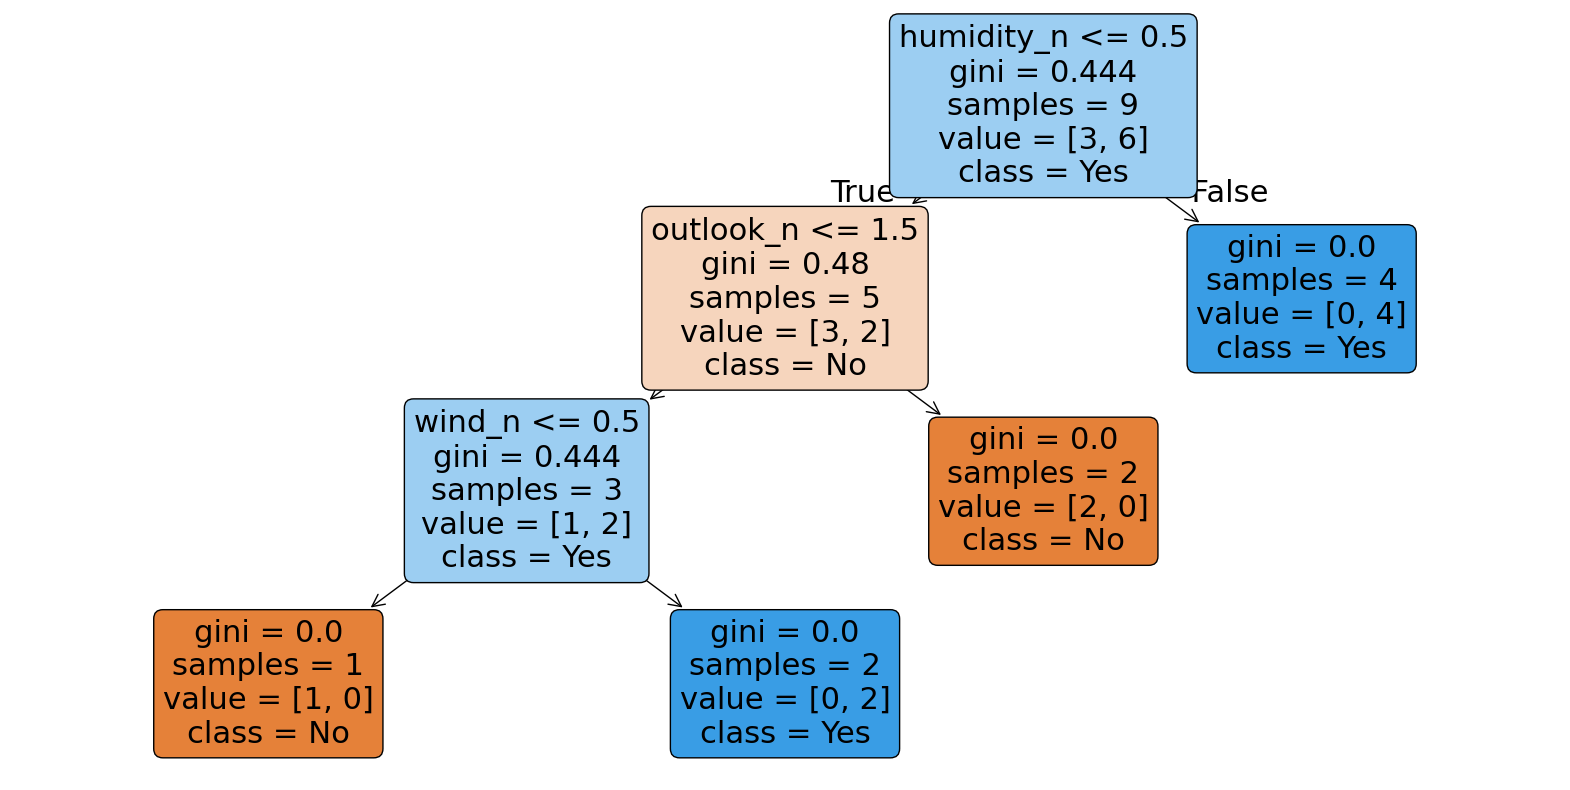

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(model,feature_names=feature_names,class_names=['No','Yes'],filled=True,rounded=True)
plt.show()